In [1]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pandas as pd
from nltk.corpus import stopwords
import re
import numpy as np


In [2]:
messages=pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

In [3]:
messages[:5]

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#ps=PorterStemmer()
lm=WordNetLemmatizer()

In [5]:
corpus=[]

for i in range(0, len(messages)):
    review=re.sub(r'[^a-zA-Z]', ' ', messages['message'][i])
    review=review.lower()
    review=review.split()
    
    review=[lm.lemmatize(word) for word in review if word not in set(stopwords.words('english')) ]
    review=' '.join(review)
    corpus.append(review)
    

In [6]:
print(corpus[:10])

['go jurong point crazy available bugis n great world la e buffet cine got amore wat', 'ok lar joking wif u oni', 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply', 'u dun say early hor u c already say', 'nah think go usf life around though', 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv', 'even brother like speak treat like aid patent', 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune', 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour', 'mobile month u r entitled update latest colour mobile camera free call mobile update co free']


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=4000)
x=cv.fit_transform(corpus).toarray()
#x=x.transpose()

y=pd.get_dummies(messages['label'])
y=y.iloc[:, 1].values
y.shape

(5572,)

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.1, random_state=0)

In [9]:
from sklearn.naive_bayes import MultinomialNB
mnb= MultinomialNB()
mnb.fit(x_train, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [10]:
y_predict=mnb.predict(x_test)

In [11]:
y_predict[0]

0

In [12]:
y_predict

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [13]:
total=0
correct=0
wrong=0

for i in range(len(y_predict)):
    total+=1
    if y_predict[i]==y_test[i]:
        correct+=1
    else:
        wrong+=1
        
print("Total : {}".format(total))
print("Correct : {}".format(correct))
print("Wrong : {}".format(wrong))

Total : 558
Correct : 550
Wrong : 8


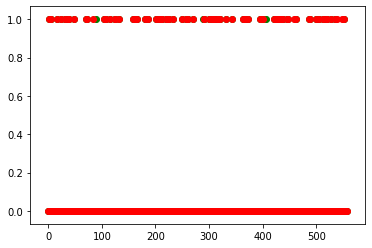

In [17]:
import matplotlib.pyplot as plt

plt.scatter(range(558), y_predict, c='g')
plt.scatter(range(558), y_test, c='r')
plt.show()